# Importando bibliotecas

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib as mpl
mpl.style.use("seaborn")


# Analisando os erros de sintaxe

## Montando o DataFrame com os erros de sintaxe

In [37]:
json_results= "merged_file.json"
json_results

'merged_file.json'

In [38]:
df_exs = pd.read_json(json_results, orient='records')
df_exs = df_exs.rename(columns = {'id':'id','erros':'tipo_do_erro', 'resultado':'passou', 'detalhes':'erro'})


In [39]:
#df_exs=df_exs.set_index('id')
df_exs.tail(4)

,erro,tipo_do_erro,id,linha,passou,usuario
5630,f = 1/σ*2*math.pi)**1/2))**-0.5*x−μ)/σ)**2),SyntaxError: invalid character in identifier,ch3_2019_03_25_22_40_11_963783.py,3,False,user_395
5631,"if x,mi,sigma!=0,0,0:",SyntaxError: invalid syntax,ch3_2019_03_09_17_39_36_402103.py,3,False,user_399
5632,,,ch3_2019_03_09_17_40_18_031055.py,,True,user_399
5633,,TypeError: unsupported operand types) for *: \...,ch3_2019_03_09_17_35_48_170466.py,,False,user_399


In [40]:
df_erros=df_exs[df_exs['passou']==False]

df_erros.head()

,erro,tipo_do_erro,id,linha,passou,usuario
0,,'PriorityError: Função inexistente ou com o no...,ch6_2019_06_06_15_17_56_287584.py,,False,user_001
1,,'PriorityError: Função inexistente ou com o no...,ch6_2019_06_06_15_16_28_178060.py,,False,user_001
2,,AssertionError: <|><O resultado obtido foi dif...,ch6_2020_09_02_19_51_53_524045.py,,False,user_002
3,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_41_10_378336.py,3,False,user_002
5,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_39_14_497485.py,3,False,user_002


In [41]:
df_sintaxe = df_erros[df_erros['tipo_do_erro'].str.contains("SyntaxError", na=False)]
df_sintaxe

,erro,tipo_do_erro,id,linha,passou,usuario
3,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_41_10_378336.py,3,False,user_002
5,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_39_14_497485.py,3,False,user_002
27,,SyntaxError: unexpected EOF while parsing,ch6_2019_08_19_13_12_34_495658.py,10,False,user_011
29,if e > maior:\n,SyntaxError: invalid syntax,ch6_2019_08_19_14_29_45_106731.py,5,False,user_011
57,F = C × 9/5)) + 32,SyntaxError: invalid character in identifier,ch6_2020_09_09_12_24_30_604505.py,2,False,user_019
58,F = C × 9/5)) + 32,SyntaxError: invalid character in identifier,ch6_2020_09_09_12_24_10_879655.py,2,False,user_019
59,F = C × 9/5) + 32,SyntaxError: invalid character in identifier,ch6_2020_09_09_12_23_50_879316.py,2,False,user_019
60,F = C × 9/5) + 32,SyntaxError: invalid character in identifier,ch6_2020_09_09_12_23_37_779638.py,2,False,user_019
61,'),SyntaxError: \'return\' outside function,ch6_2020_09_09_12_26_55_940386.py,3,False,user_019
77,x=c × 9/5) + 32,SyntaxError: invalid character in identifier,ch6_2020_03_30_14_33_49_479955.py,2,False,user_028


In [42]:
df_sintaxe["possivel_solucao"]="--"

In [43]:
df_sintaxe.head()

,erro,tipo_do_erro,id,linha,passou,usuario,possivel_solucao
3,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_41_10_378336.py,3,False,user_002,--
5,def celsius_para_fahrenheittemperatura_cel...,SyntaxError: invalid syntax,ch6_2020_09_02_19_39_14_497485.py,3,False,user_002,--
27,,SyntaxError: unexpected EOF while parsing,ch6_2019_08_19_13_12_34_495658.py,10,False,user_011,--
29,if e > maior:\n,SyntaxError: invalid syntax,ch6_2019_08_19_14_29_45_106731.py,5,False,user_011,--
57,F = C × 9/5)) + 32,SyntaxError: invalid character in identifier,ch6_2020_09_09_12_24_30_604505.py,2,False,user_019,--


# Analisando e classificando os erros

In [44]:
erro_import=0
erro_antes_do_return=0
erro_fechar_parenteses=0
erro_abrir_parenteses=0
erro_potencia=0
erro_if=0
erro_while=0
erro_for=0
erro_def=0
erro_pi=0
erro_vezes=0
erro_print=0

In [45]:
def is_int(val):
    try:
        num = int(val)
    except ValueError:
        return False
    return True


In [46]:
lista_tipos_erros=[]
for ind in df_sintaxe.index: 
    sol='--'
    erro = df_sintaxe["erro"][ind]
    erro=str(erro)
    
#     if "return" in erro and len(erro)<30:
#         sol="Verifique a linha antes do return"
#         erro_antes_do_return+=1
    if "import" in erro or "Import" in erro:
        sol="Verifique a maneira com que está realizando o import"
        erro_import+=1
    if "(" in erro:
        abre_parenteses=erro.count('(')
        fecha_parenteses=erro.count(')')
        if abre_parenteses>fecha_parenteses:
            sol="Faltou fechar um parênteses"
            erro_fechar_parenteses+=1
        elif abre_parenteses<fecha_parenteses:
            sol="Faltou abrir um parênteses"
            erro_abrir_parenteses+=1
        
    if "^" in erro:
        sol="Potência em Python é: **"
        erro_potencia+=1
        
    if "if" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'if'"
        erro_if+=1
        
    if "while" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'while'"
        erro_while+=1
        
    if "for" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'for'"
        erro_for+=1
        
    if "def" in erro and ":" not in erro:
        sol="Faltou ':' na linha do 'def'"
        erro_def+=1
        
    if "π" in erro:
        sol="π é math.pi"
        erro_pi+=1
        
    if ")(" in erro:
        sol="esqueceu o sinal de *"
        erro_vezes+=1
        
    anterior = "a"
    for atual in erro:
        if (is_int(anterior) and atual.isalpha()) or (is_int(anterior) and atual=="(") or (anterior==")" and (is_int(atual) or atual.isalpha())): 
            erro_vezes+=1
            sol="esqueceu o sinal de *"
        anterior=atual
    
    if "print" in erro and "(" not in erro:
        sol="print tem parênteses no python 3"
        erro_print+=1
        
    
        
    df_sintaxe["possivel_solucao"][ind]= sol
        
    
        
    
    
    

In [47]:
erros = {'tipos': ["erro_import", "erro_abrir_parenteses","erro_fechar_parenteses", "erro_potencia", "erro_if", "erro_while", "erro_for", "erro_def", "erro_pi", "erro_vezes", "erro_print"],
        'quantidade': [erro_import,erro_abrir_parenteses, erro_fechar_parenteses, erro_potencia,erro_if, erro_while,erro_for, erro_def, erro_pi,erro_vezes, erro_print]
        }

df_classificacao = pd.DataFrame(erros, columns = ['tipos', 'quantidade'])


In [48]:
df_classificacao.set_index("tipos")

,quantidade
tipos,
erro_import,41
erro_abrir_parenteses,8
erro_fechar_parenteses,223
erro_potencia,1
erro_if,188
erro_while,0
erro_for,7
erro_def,93
erro_pi,16


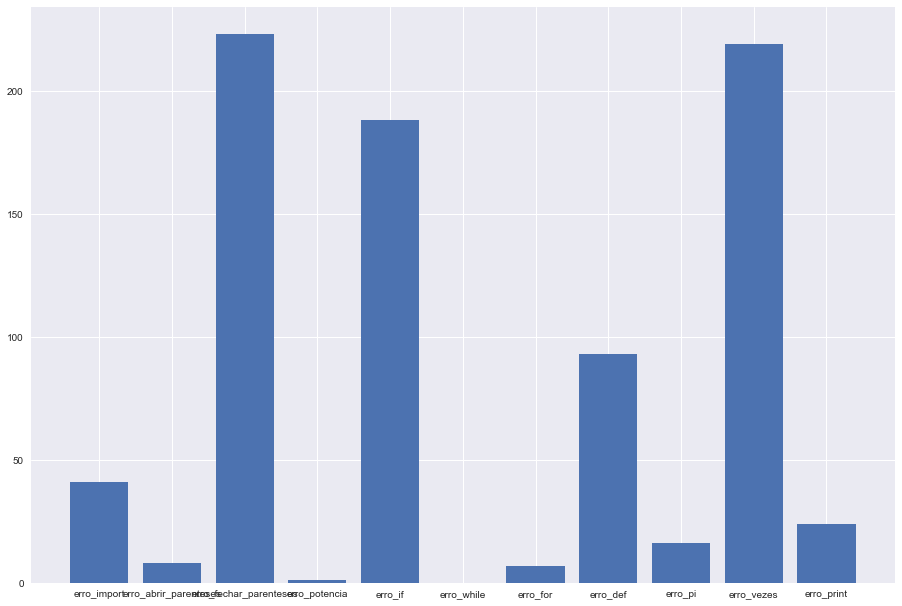

In [49]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(df_classificacao["tipos"], df_classificacao["quantidade"])
plt.show()

In [50]:
users = df_sintaxe["usuario"]
users 

3       user_002
5       user_002
27      user_011
29      user_011
57      user_019
58      user_019
59      user_019
60      user_019
61      user_019
77      user_028
80      user_028
93      user_034
109     user_045
113     user_045
120     user_049
128     user_052
138     user_052
142     user_052
146     user_052
147     user_052
148     user_052
157     user_054
176     user_060
189     user_069
242     user_092
250     user_093
258     user_100
259     user_100
263     user_103
265     user_103
          ...   
5514    user_372
5515    user_372
5516    user_372
5517    user_372
5518    user_372
5519    user_372
5520    user_372
5521    user_372
5522    user_372
5523    user_372
5524    user_372
5525    user_373
5533    user_374
5534    user_374
5563    user_378
5566    user_378
5568    user_379
5572    user_379
5577    user_379
5587    user_383
5590    user_383
5593    user_385
5601    user_386
5604    user_391
5607    user_391
5618    user_393
5620    user_393
5629    user_3

In [51]:
# f, ax = plt.subplots(figsize = (32,20))
# plt.figure(figsize = (640,200))
erros = df_sintaxe["possivel_solucao"]
users = df_sintaxe["usuario"]
table = pd.crosstab(erros, users)
# plot=sns.heatmap(table,ax=ax, annot=True, cmap="YlGnBu")
# f.savefig("heatmap.png", dpi=200)
table

usuario,user_002,user_003,user_004,user_005,user_006,user_007,user_009,user_011,user_012,user_013,...,user_382,user_383,user_385,user_386,user_391,user_393,user_395,user_396,user_397,user_399
possivel_solucao,,,,,,,,,,,,,,,,,,,,,
--,0,0,0,4,0,1,3,2,2,0,...,6,0,1,0,0,2,2,1,2,1
Faltou ':' na linha do 'def',2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'for',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou ':' na linha do 'if',0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,1,0,0
Faltou abrir um parênteses,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Faltou fechar um parênteses,0,2,4,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Verifique a maneira com que está realizando o import,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
esqueceu o sinal de *,0,0,0,0,3,0,0,2,0,0,...,0,2,0,1,2,2,0,0,0,0
print tem parênteses no python 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Digite o ID de um usuário para descobrir seus principais erros

### Selecione o usuário:

In [55]:
usuario = "user_011"

In [56]:
table[usuario]

possivel_solucao
--                                                      2
Faltou ':' na linha do 'def'                            0
Faltou ':' na linha do 'for'                            0
Faltou ':' na linha do 'if'                             0
Faltou abrir um parênteses                              0
Faltou fechar um parênteses                             0
Verifique a maneira com que está realizando o import    0
esqueceu o sinal de *                                   2
print tem parênteses no python 3                        0
π é math.pi                                             0
Name: user_011, dtype: int64

In [57]:
errors = df_sintaxe.loc[df_sintaxe["usuario"]==usuario]
errors.loc[:, ["erro", "linha","linha","possivel_solucao"]]

,erro,linha,linha,possivel_solucao
27,,10,10,--
29,if e > maior:\n,5,5,--
3368,f = 1/sigma*2*math.pi)**0.5))exp-0.5x - mi...,3,3,esqueceu o sinal de *
3371,f = 1/sigma*2*math.pi)**0.5))math.exp-0.5x...,5,5,esqueceu o sinal de *
